https://wikidocs.net/80437
https://blog.naver.com/gkswns3708/222811466198

In [277]:
import torch.nn.functional as F
import torch.nn as nn
from einops import rearrange
from torch import Tensor
import torch
from torch.utils.data import DataLoader
from dataset import ImageLayout
from extractor.image import ImageEncoder, ImageFeatureExtractor
from extractor.positional_encoding import build_position_encoding_1d
from cgllike import CLDM
from diffusers import DDPMScheduler
import os
from PIL import Image
from PIL import ImageDraw


In [1]:
from tqdm import tqdm

In [286]:
len(loader)/16

302.4375

In [3]:
sample = next(iter(loader))

In [6]:
index = 0

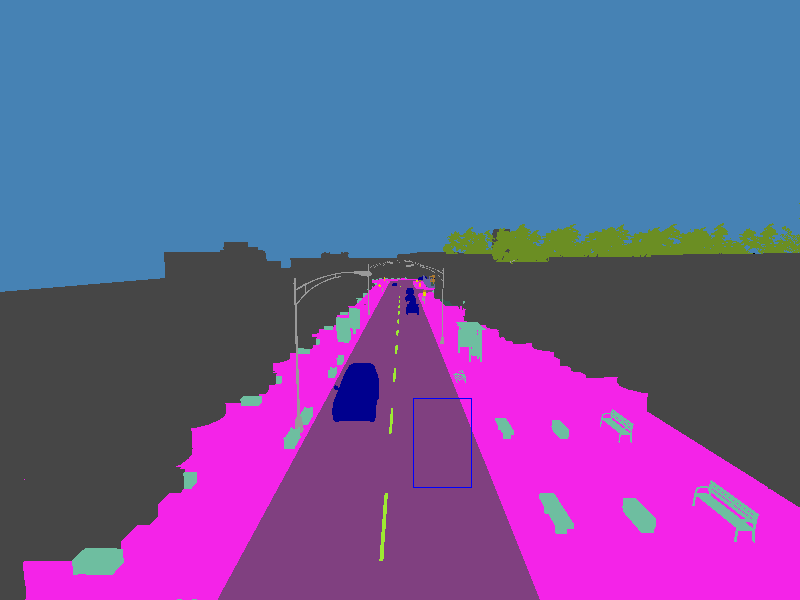

In [275]:
index +=1 
img = Image.open(sample['sr'][index])
draw = ImageDraw.Draw(img)
original_box = sample['box_cond'][index].cpu().numpy()
original_box = (original_box + 1) / 2
ocx,ocy,ow,oh = original_box
ox = int((ocx - ow / 2) * 800)
oy = int((ocy - oh / 2) * 600)
ox2 = int((ocx + ow / 2) * 800)
oy2 = int((ocy + oh / 2) * 600)
draw.rectangle([ox, oy, ox2, oy2], outline="blue", width=1)
img

In [276]:
img.size

(800, 600)